## Creamos un conjunto de datos aleatorios. 

* 200 ejemplos, de los cuales 100 serán usados para entrenar el clasificador y 100 para test.

* 2 características, informativas, ninguna redundante

* weights: Las proporciones de ejemplos asignados a cada clase 50%.

* random_state: Valor para reproducir los ejemplos (17).

**Salida**: *X* los ejemplos e *Y* las clases que pertenecen cada ejemplo.

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200,
         n_features=2,
         n_informative=2,
         n_redundant=0,
         weights=[.5, .5],
         random_state=17)


In [2]:
print(X[:10])

[[-1.32787797 -1.68214793]
 [-1.22074463 -0.50966344]
 [-0.98123333 -0.71594291]
 [-1.01292374  0.78292116]
 [ 1.13127379  0.9281508 ]
 [ 1.37589877 -1.64351478]
 [-0.95569597 -1.33327158]
 [-0.99437425 -0.65368677]
 [ 1.6159983   1.36127945]
 [-0.66089299  1.06907984]]


*Imprimimos los valores de 10 valores de X y la salida de los clasificadores. Podemos observar que las clases están balanceadas 101 ceros y 99 unos.*

In [3]:
import collections
print(y)
print(collections.Counter(y))


[0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1]
Counter({0: 101, 1: 99})


## Clasificador Perceptrón multi-capa  (Multi-layer Perceptron classifier - MLPC)

* **max_iter** Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. 
* **random_state** Determines random number generation for weights and bias initialization

* **fit** - Fit the model to data matrix X and target(s) y.



In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=600, random_state=123).fit(X[:100], y[:100])

## Creamos una serie de puntos (600) desde los valores -3 a 3 con diferencia de 0.1

Pasamos esa serie de puntos al clasificador (clf) MLPC y nos devuelve las probabilidades que pertenezca a la clase 1 con la función *predict_proba*.


In [5]:
import numpy as np
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]   #Array de dos coordenadas
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

print ('xx.shape:', xx.shape)
print ('xx:', xx[0:3]) # Array -3, Array -2.99 hasta array 2.99
print ('yy:', yy[0:3]) # Array -3, -2,99, -2.98 hata 2.99. Repetido 600 veces.

print ('xx.ravel:', xx.ravel()) #shape 3600
print ('grid',grid[0:3], 'grid shape',grid.shape) # 3600 puntos (x,y) con direncia de 0.1

print('proba:',clf.predict_proba(grid)[:, 1])
print('probs:',probs[0:3])
print('probs shape:',probs.shape)



xx.shape: (600, 600)
xx: [[-3.   -3.   -3.   ... -3.   -3.   -3.  ]
 [-2.99 -2.99 -2.99 ... -2.99 -2.99 -2.99]
 [-2.98 -2.98 -2.98 ... -2.98 -2.98 -2.98]]
yy: [[-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]
 [-3.   -2.99 -2.98 ...  2.97  2.98  2.99]]
xx.ravel: [-3.   -3.   -3.   ...  2.99  2.99  2.99]
grid [[-3.   -3.  ]
 [-3.   -2.99]
 [-3.   -2.98]] grid shape (360000, 2)
proba: [4.35145034e-04 4.49635608e-04 4.64608503e-04 ... 9.98563825e-01
 9.98556187e-01 9.98548509e-01]
probs: [[4.35145034e-04 4.49635608e-04 4.64608503e-04 ... 7.61403145e-01
  7.59535426e-01 7.57657739e-01]
 [4.28783128e-04 4.43061942e-04 4.57816033e-04 ... 7.60842361e-01
  7.58971641e-01 7.57090960e-01]
 [4.22514196e-04 4.36584340e-04 4.51122823e-04 ... 7.60280673e-01
  7.58406955e-01 7.56523281e-01]]
probs shape: (600, 600)


## Visualizamos el experimento
* Los gradientes son la probabilidad que los puntos pertenezcan a la clase 1 o 0. Cuanto más oscuro sea el azul se acerca al 100% y cuanto más oscuro sea el rojo se acerca al 0%.

* La franja blanca señala el límite de las clases, ambas clases están al 50%. **Ese es el límite de decisión**.
* Visualizamos los últimos 100 puntos creados inicialmente. Los azules pertenecen a la clase 1 y los rojos a la clase 0. Los puntos azules que estén por debajo del límite de decisión estarán incorrectamente clasificados, así como los puntos rojos que estén por encima del límite de decisión.

[None, (-3.0, 3.0), (-3.0, 3.0)]

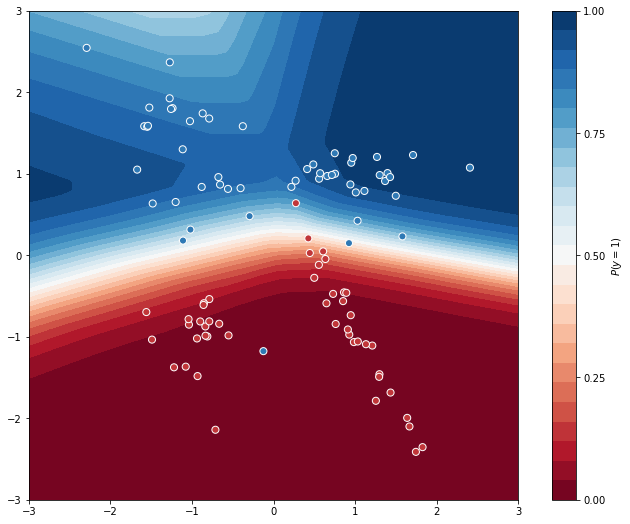

In [6]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 9))
    # Plot the contour background
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
    # Plot the test set (latter half of X and y)
ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(aspect="equal",xlim=(-3, 3), ylim=(-3, 3))

## Creamos una función que dibuje el límite de decisión, tanto de los elementos a probar como la introducción de elementos 'envenenados'

In [7]:
import matplotlib.pyplot as plt
def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f, ax = plt.subplots(figsize=(12, 9))

    ax.scatter(X_orig[100:,0], X_orig[100:, 1], c=y_orig[100:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

# Límite de decisión obtenido con el conjunto de datos

Utilizamos la función que hemos creado que solamente muestra los datos clase 1 en blanco y clase 0 en negro y el límite de decisión que obtenemos de las probabilidades


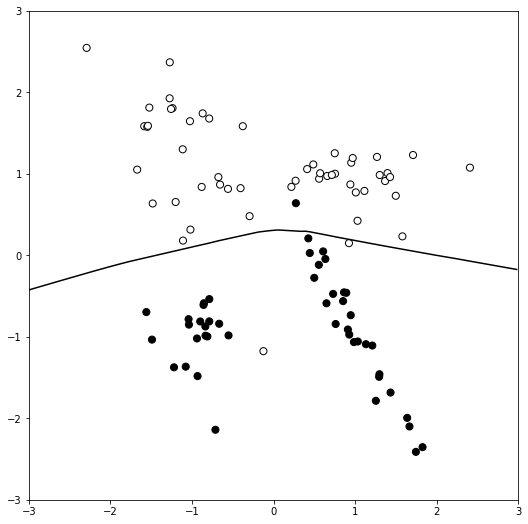

In [8]:
plot_decision_boundary(X, y, probs)

## Inyectamos 5% chaff (trafico envenenado)

* Creamos cinco puntos de -2 a -1 en X y todos con valores 0.1 en y.
* Todos ellos clasificados en la clase 1.

In [9]:
num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff),np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)
print(chaff_X)

[[-2.    0.1 ]
 [-1.75  0.1 ]
 [-1.5   0.1 ]
 [-1.25  0.1 ]
 [-1.    0.1 ]]


## 1-Primer ataque

Entrenamos incrementalmnte nuestro clasificador ajustando el modelo a los nuevos cinco puntos (trafico de ataque) que hemos generado.

Esta clasificación nos da una nueva probabilidad de predicción que es utilizada para imprimir el nuevo límite de decisión.

* Observamos dos límites de decisión, en gris el original y en negro el nuevo.
* Los nuevos cinco puntos son marcados con estrellas

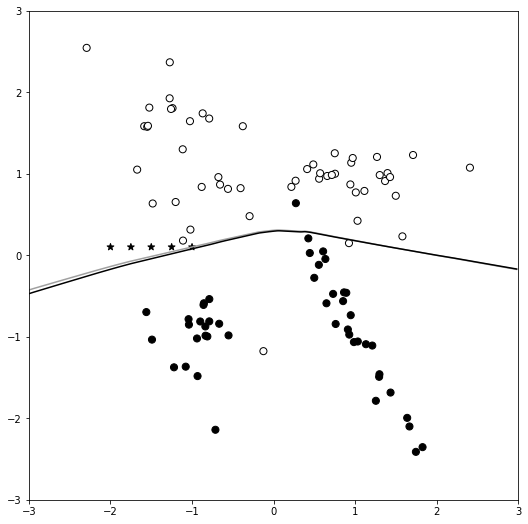

In [10]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## 2-Segundo ataque

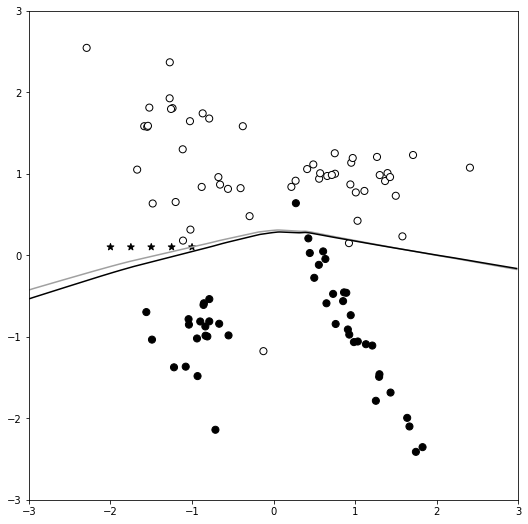

In [11]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## 3-Tercer ataque


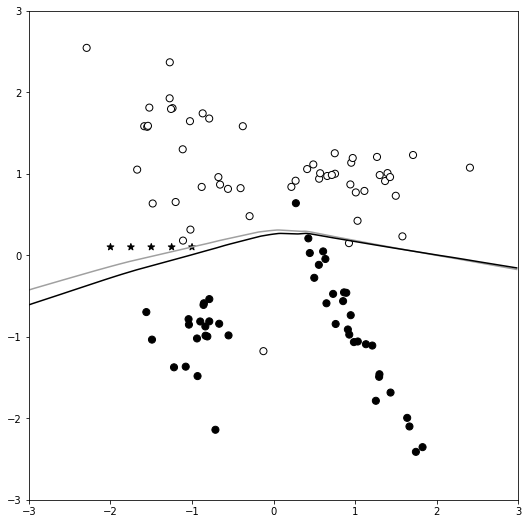

In [12]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## 4-Cuarto ataque


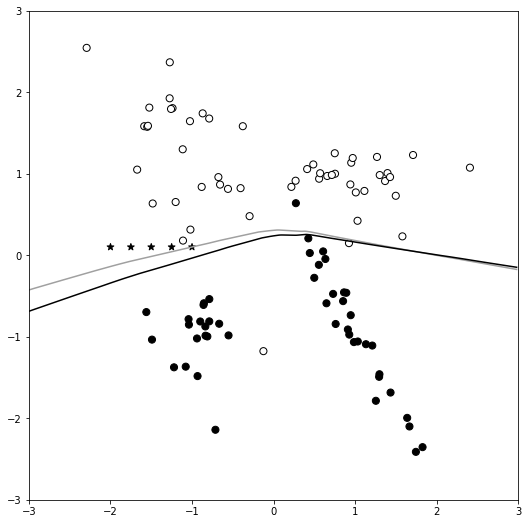

In [13]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## 5-Quinto ataque


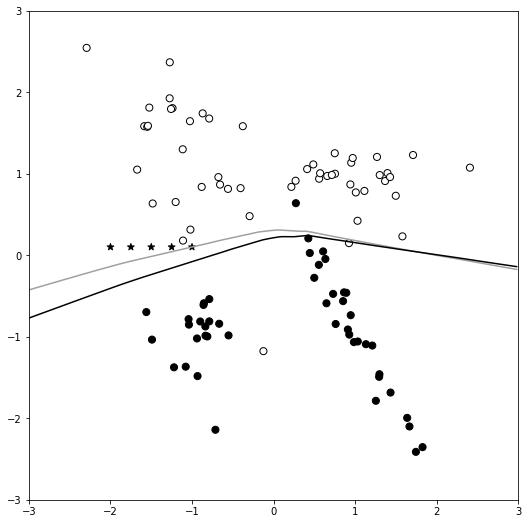

In [14]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

# Conclusiones

* Cada vez que ejecutamos el entrenamiento parcial, el límite de decisión decrementa. 

* Esta situación hace que se cree un intervalo entre las dos curvas, el límite original y el modificado. 

* Cualquier punto que hubiera estado en este intervalo inicialmente estaba clasificado en la clase 0 (y=0), pero ahora estaría en la clase 1 (y=1). 

* Cuánto mas se incrementa los puntos introducidos el límite de decisión deja posible un intervalo mayor para establecer puntos no clasificados correctamente, lo cuál implica una seria degradación del modelo.

* Como conclusión el atacante ha tenido éxito en crear un clasificación incorrecta de los ejemplos.